In [1]:
%matplotlib inline

import cv2
import pytesseract
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np

pytesseract.get_tesseract_version()

LooseVersion ('4.0.0.20181030')

## First test

The screenshots from minecraft can be found in the screenshot directory on windows as of writing this. Usually AppData\Roaming\.minecraft\screenshots. F3 will bring up the debugging showing the location in the world. Hitting F2 will screenshot. That is how I obtained these images. 

In [4]:
screenshot_dir = 'Screenshots'
text_dir = 'TextFiles'

if not os.path.exists('Processed'):
        os.mkdirs('Processed')
processed_dir = 'Processed'
if not os.path.exists('output'):
        os.mkdirs('output')
output_dir = 'output'

In [3]:
img_name = r'screenshot_test.png'

In [5]:
img = cv2.imread(img_name)
print(img.shape)

(1080, 1920, 3)


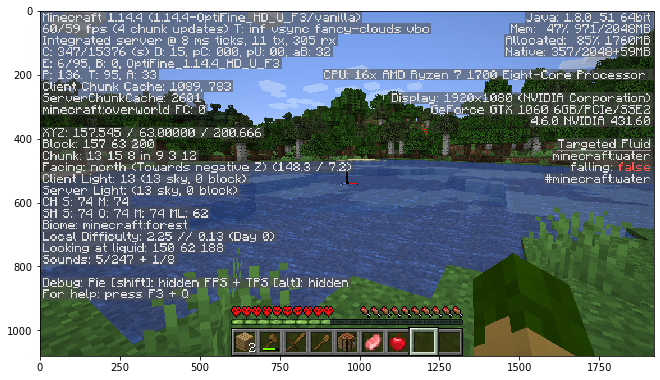

In [6]:
# OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!

fig, ax = plt.subplots(figsize=(11,11))
im = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
def get_string(img, config = r'--psm 3'):
    string = pytesseract.image_to_string(img, lang='eng', config = config)
    return string

In [12]:
def clean_string(string):
    tmp = ''
    for line in string:
        tmp += line.replace('\n', ' ') #strip('\n') #
    tmp = tmp.replace("'",'"')
    return tmp

In [28]:
string = get_string(img)

In [29]:
string = clean_string(string)
print(string)

Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanillas &H/59 fps o chunk updates: T: inf wsanc fancu—clouds vbo Integrated server @ 2 m= ticks, 11 tx, 3685 rx IS T el el O o I S = W 1 1 I o = e E: 6795 E: A, OptiFine_1.14.4_HO F: 136 T: 95, A: 33 Client Chunk Cache: 1829 723 ServerChunkBache: Z6E1 minectattoverworld FCE  ATZ 157.545 / 628606868 ¢ 26860 685 Block: 157 &2 2608 . : Chunk: 12 1528 in9 32 12 e Facing: north (Towards negative 22 (1433 £ 7.2 Client Light: 12 13 =ky, 8 blocks  Serwver Light: 13 sky, 8 blocks  CH S 79 H: 74  SHS 7074 M 79 HL: 62  Biome: minecraft:forest  Lozal Difficulty; 225 £ 812 (Dag &  Looking at Lliguid: 158 &2 188  Sounds: 52497 + 158  Oebug: Fie [shiftl: hidden FFS + TFS [altl hidden  : Digp_ga,%  Jf 3  For help: press F3 + 1 PS A e Rk  - A - A                                           Jdaua: 1208 51 cdhbit Mem: 474 971 2892ME Allozated: 235K 17eBME Hative: 257 =26848+52M6  CEL: 16x AMD Fuzen 7 17688 Eight-Core =Tl =t 19281886 (HYIDIA Corporation?  efgroe 0T 

Not a great conversion accuracy it seems. Let's use the Jaccard measure to try and quantify the difference between a ground truth I typed up.

In [13]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [21]:
with open(os.path.join(text_dir, 'ground_truth.txt'), 'r') as file:
    ground_truth = ''
    for line in file:
        ground_truth += line
file.close()
ground_truth = clean_string(ground_truth)
print(ground_truth)

Minecraft 1.14.4 (1.14.4-OptiFine_HD_U_F3/vanilla) Java: 1.8.0_51 64bit 60/59 fps (4 chunk updates) T: inf vsync fancy-clouds vbo Mem: 47% 971/2048MB Integrated server @8 ms ticks, 11 tx, 305 rx Allocated: 85% 1760MB C: 347/15376 (s) D: 15, pC: 000, pU: 00, aB:32 Native: 357/2048+59MB E: 6/95, B: 0, OptiFine_1.14.4_HD_U_F3 P:136. T:95, A: 33 CPU: 16x AMD Ryzen 7 1700 Eight-Core Processor Client Chunk Cache: 1089, 783 ServerChunkCache: 2601 Display: 1920x1080 (NVIDIA Corporation) minecraft:overworld FC: 0 GeForce GTX 1060 6GB/PCIe/SSE2 4.6.0 NVIDIA 431.60 XYZ: 157.545 / 63.00000 / 200.666 Block: 157 63 200 Targeted Fluid Chunk: 13 15 8 in 9 3 12 minecraft:water Facing: north (Towards negative Z) (-148.3 / 7.2) falling: Client Light: 13 (13 sky, 0 block) #minecraft:water Server Light: (13 sky, 0 block) CH S: 74 M: 74 SH S: 74 O: 74 M: 74 ML: 62 Biome: minecraft:forest Local Difficulty: 2.25 // 0.13 (Day 0) Looking at liquid: 150 62 188 Sounds: 5/247 + 1/8  Debug: Pie [shift]: hidden FPS 

In [30]:
sim = get_jaccard_sim(string, ground_truth)
print(sim)

0.21052631578947367


## Improvements

Try some image processing to see if we can make it easier. First, try re-sizing and converting to greyscale

In [31]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

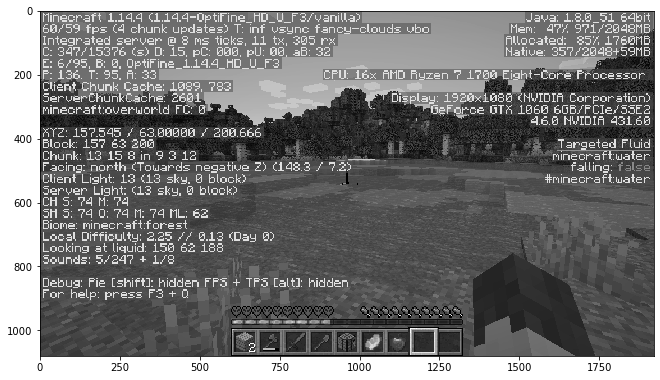

In [32]:
fig, ax = plt.subplots(figsize=(11,11))
im = plt.imshow(grey_img, cmap='gray')
plt.show()

In [33]:
string_grey = get_string(grey_img)
string_grey = clean_string(string_grey)
print(string_grey)

Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wanillas Jdava: 126851 &dbit &H/59 fps o chunk updatess T: inf wsanc fancu—clouds vbo Mem: 474 971 2892M6 Integrated server @ 2 m= ticks, 11 tx, 3685 rx Allozated: 8357 17EAME e £ il o oy O~ I s e = iy . [ I | = e Hative: 357/ 2892+53HME  E: /95, B: 8, OptiFine_1.14.4_HD : = F: 136, T: 95, A: 33 CELE 162 AMD Fuzen 7 1788 Eight-Core Frocessor ] Digp_l.’a"u 19281038 CHWIDIA Corporation: i        Client Chunk Cache: 1829 723 ServerChunkCache: 2681 an:-r*ce [ I B Y Tl ) =l 4668 HVIDIA 43168  minectattoverworld FCOE  TR T R e N s s e e e T  Block: 157 &2 Z60A Targeted Fluid Chunk: 12 152 in 9 3 12 R o e e R L e Facing: north (Towards negative 22 (1483 7 7.2 falling: fal=e Client Light: 12 13 =sky, B block? B #minecr-aftwater Serwver Light: 13 =ky, 8 blocks  CH S 79 H: 74  SHS 70 74 M 79 HL: 62  Biome: minecraft:forest  Lozal Difficulty; 225 £ 812 (Dag &3 Looking at Lliguid: 1568 &2 188 Sounds: 52497 + 158  Oebug: Fie [shiftl: hidden FFS + TFS [altl

In [34]:
get_jaccard_sim(string_grey, ground_truth)

0.20754716981132076

Maybe worse... :( Most likely because it is white text perhaps.

In [14]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_LINEAR):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [36]:
med_img = image_resize(img, height = 720)
med_img.shape

(720, 1280, 3)

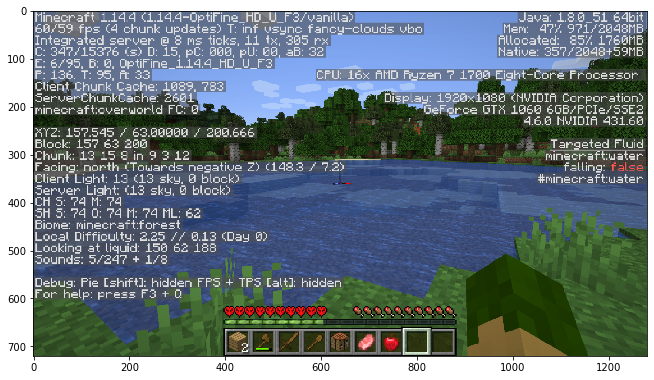

In [37]:
fig, ax = plt.subplots(figsize=(11,11))
im = plt.imshow(cv2.cvtColor(med_img, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
string_med = get_string(med_img)
string_med = clean_string(string_med)
print(string_med)

R= XN - T  RIS T ] Cliznt Chunk Cache: 1829, 723 ServerChunkBache: 2601 ¥ Dl"p‘l"i’j 19283026 CHVIDIA Corporation?  EFgroe OTH 1868 606/FLIe 3562 468 NVIDIA 43168  minectaftoverworld FCTE  HIZ: 157,545 / 6300000 / 206666     Block: 157 63 266 E . i g = = Targeted Fluid Churmk: 12 15 8 in 9 3 12 £ saml minecrattuater Facing: north (Towards negative 2) (1423 7 7.2 falling: false Client Light: 12 {13 sku, 8 block) 2= #minecraftuater Server Light: <12 sky, 8 block>  CHS: 74074  SH S 74 0: 74 M 74 ML 62  Biome: minecraftforest  Local Difficulty: 225 /¢ 8.13 (Day 8> z Looking at liguid: 158 62 188 ER Sounds: 55247 + 178  Debua: Fie [shiftl: hidden FFS + TFS [altl: hidden For help: press F3 + 0 pa  CIGRPRIRAERaRED SR \\" S  CEEEEDEOER .k


In [39]:
get_jaccard_sim(string_med, ground_truth)

0.1956521739130435

Meh

In [40]:
med_grey_img = image_resize(grey_img, height = 720)
med_grey_img.shape

(720, 1280)

In [41]:
string_medgrey = get_string(med_grey_img)
string_medgrey = clean_string(string_medgrey)
print(string_medgrey)

Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wanillas Jdava: 1.2.8_51 &dbit EB8/59 fps (4 chunk updates) T:inf wsunc fanc Integrated server @ 8 ms ticks, 11 tx, 385 i  APt 35?!2348+59MB BTN T L Ras £x AMD Fuzen 7 17868 Eight—Core Frocessor  Cliznt Chunk Cache: 1829, 723  ServerChunkbache: 2681 ¥ DI.P_I‘\% 192810268 CHVIDIA Corporation?  I T=TaT =) i TR =T Tl U B eFgroe OTH 16868 606/FLIe 3562 468 HYIDIA 432168     HIZ: 157,545 / 6300000 / 206666  Block: 1537 &2 260 : Targeted Fluid Churmk: 12 15 8 in 9 2 12 ; g minecraftuater Facing: north (Towards negative 2) (1423 ~ T falling: false Client Light: 12 {132 sk, 8 block) #ninecraftuater Server Light: (12 sky, 8 block>  o =R e N |  SH S 74 0074 M 74 ML 62  Biome: minecraftforest  Local Difficulty: 225 /. 8,13 (Day &> Looking at liguid: 1568 &2 182 Sounds: 54247 + 1458  Debua: Fie [shiftl: hidden FF3 + TFS [altl: hidden For help: press F2 + 0


In [42]:
get_jaccard_sim(string_medgrey, ground_truth)

0.204

Let's just start storing these and compare the others:

In [43]:
tests = []
tests.append(string)
tests.append(string_grey)
tests.append(string_med)
tests.append(string_medgrey)

In [44]:
test_strings = pd.Series(tests)

In [45]:
sim = []
for test in tests:
    sim.append(get_jaccard_sim(ground_truth, test))

In [46]:
simularity = pd.Series(sim)

In [47]:
dataframe = {'Name': ['string', 'string_grey', 'string_med', 'string_medgrey'], 'String': test_strings, 'Jaccard Sim': simularity}
df = pd.DataFrame(dataframe)

In [48]:
df.head()

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000


Hmmm so looking at this what I thought was good qualitatively was maybe worse...let's check on a different test image to check how it is doing.

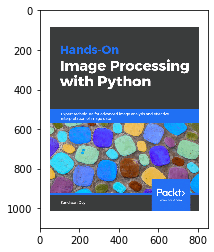

In [49]:
test_img = cv2.imread('test_img.png')
fig, ax = plt.subplots()
im = plt.imshow(test_img)
plt.show()

In [50]:
string_test = pytesseract.image_to_string(test_img)
string_test = clean_string(string_test)
print(string_test)

Image Processing with Python  Expert techniques for advanced image analysis and effective interpretation of image data  o [e/14p}  s  Sandipan Dey


So, it does a pretty good job at getting the text from this cover page, but I have found it is extremely sensitive to font type. Working best for standard fonts like Times New Roman, Arial etc.

Let's apply some super basic image processing on our actual image to see if we can change the font to be something more like what tesseract has been trained on. I first loaded and played around in ImageJ to quickly prototype some params. The threshold is pretty consistent and wonderfully enough there is a faint grey block surrounding the text so that it never really interferes with the image itself.

In [51]:
thresh_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,thresh_img = cv2.threshold(thresh_img,220,255,cv2.THRESH_BINARY)

In [52]:
thresh_img.shape

(1080, 1920)

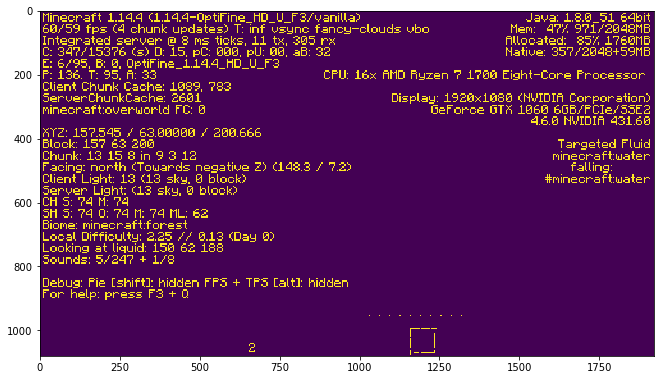

In [53]:
fig, ax = plt.subplots(figsize=(11,11))
im = plt.imshow(thresh_img)
plt.show()

In [54]:
string_thresh = get_string(thresh_img)
string_thresh = clean_string(string_thresh)
print(string_thresh)

Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wanillas Jdava: 128 51 &dbit  &H8/59 fps o chunk updatess T: inf wsanc fancy—clouds vbo Mem: 477 9712892M6  Integrated server @ 2 m= ticks, 11 tx, 3685 rx Allozated: 837 17aEME  C: 247715376 (=0 O: 15, pC: 88, pU: 68, ab: 32 Hative: 3537/28428+59M6  E: 6795 B A, OptiFine_1.144_HD_U_F232  F: 136, T: 95, A: 33 CFLU: 16x AMD Fyzen 7 1788 Eight—-Core Frocessor  Client Chunk Cache: 18389, 723  ServerChunkCache: 2681 Oizplag: 1928x16828 CHVIDIA Corporation:  minectattoverworld FC: @ Oeforce O0TH 1868 &06/FCIesS3E2 4668 HVIDIA 43168  ATZ: 157.545 7 62860868 / 2060686  Block: 157 &2 Z6A Targeted Fluid  Chunk: 12 15 2in 9 3 12 minecraftuwater  Facing: north (Towards negative 2 (1483 7 7.2 fallina:  Client Light: 132 <132 =ky, @ blocks #minecraftwater  Server Light: <132 =ky, 8 blocks  CH S 79 H: 74  SHS 70 74M 79 HL: 62  Biome: minecraft:forest  Lozal Difficulty; 225 44 812 (Dag @ Looking at Lliguid: 158 62 188  bl T T I Tt A S I  Oebug: Fie [shiftl: h

In [55]:
def add_row(df, name, values):
    df = df.append({'Name': '{}'.format(name), 'String': values, 'Jaccard Sim': get_jaccard_sim(ground_truth, values)}, ignore_index=True)
    return df

In [56]:
df = add_row(df, 'string_thresh', string_thresh)

In [57]:
df

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063


In [ ]:
# Update previous values
#df.loc[df['Name'] == 'string_thresh' , 'Accuracy'] = get_accuracy(ground_truth, string_thresh)

In [ ]:
#df.drop_duplicates() or df.drop(df.tail(n).index,inplace=True)

In [ ]:
# params = [cv2.IMWRITE_PNG_COMPRESSION, 1]
# cv2.imwrite('Thresh_img.png', thresh_img, params) 

So it is arguably better. I then tried some smoothing to be able to change the font. Not shown but a hard part was to convince the OCR engine to keep decimals and the slashes. It did a pretty decent job, at least for the specific characters we are after.

In [15]:
def process_image(img):
    thresh_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh_img = cv2.threshold(thresh_img,220,255,cv2.THRESH_BINARY)
    thresh_img = cv2.GaussianBlur(thresh_img,(5,5), 0)
    thresh_img = cv2.bilateralFilter(thresh_img,5,50,10)
    _,thresh_img = cv2.threshold(thresh_img,50,255,cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    thresh_img = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel)
    return thresh_img

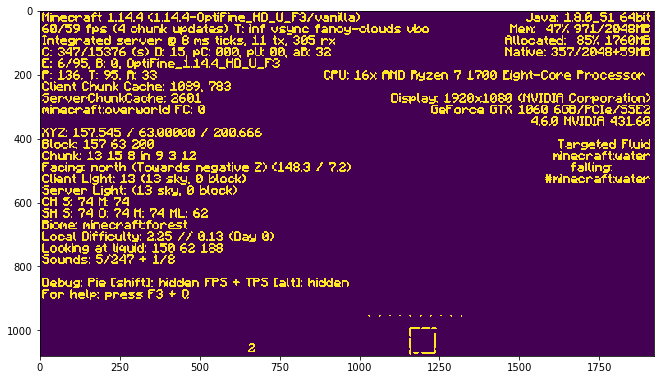

In [59]:
processed_img = process_image(img)
fig, ax = plt.subplots(figsize=(11,11))
im = plt.imshow(processed_img)
plt.show()

In [60]:
string_processed = get_string(processed_img)
string_processed = clean_string(string_processed)
print(string_processed)

Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanilla) Java: 1.80_51 64bit  9 fps (4 chunk updates) T: inf vsunc fancy—-clouds vbo Mem: 47/ 971/2648MB Integrated server @ 8 ms ticks, 11 tx, 3685 rx Allocated:. 85/ 1766MB C: 39?/15376 (s> D: 15, pC: 000, pU: 60, ab: 32 Native: 357/2048+59MB E: 6/95, B: 0, OptiFine_1.1449_HD_U_F3 P:136. T: 95, A: 33 CPU: 16x AMD Ruzen 7 1700 Eight-Core Processor Client Chunk Cache: 1689, 7?83 ServerChunkCache: 2601 Display. 1920x1680 (NVIDIA Corporation) minecraftoverworld FC: 6 Geforce OTK 1860 6GB/PCle/SSE2  4.6.0 NVIDIA 431.60 8YZ: 157.545 / 63.00000 / 200.666 Block: 157 63 200 Targeted Fluid Chunk: 13158in 9 3 12 minecraftuater Facing: north (Towards negative 2> (148.3 / 7.2) alling: Client Light: 13 <13 sky, @ block> #minecraftuater  Server Light: (13 sky, 8 block) CHS: 7?9 M ?  SHS: 790?74 M 79 ML: 62  Biome: minecraft.forest  Local Difficulty: 2.25 // 8.13 (Day @) Looking at liquid: 156 62 188 Sounds: 572497 + 1/8  Debug: Fie [shift). hidden FFS + TPS 

In [61]:
df = add_row(df, 'string_processed', string_processed)

In [62]:
df

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063
5,string_processed,Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanil...,0.473684


Try inverting to have typical black text on white background

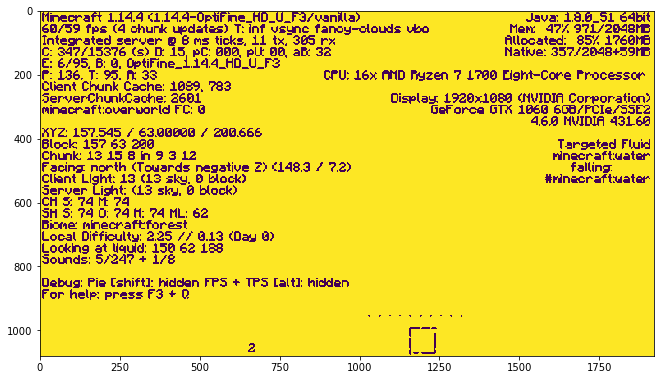

In [63]:
processed_img = cv2.bitwise_not(processed_img)
fig, ax = plt.subplots(figsize=(11,11))
im = plt.imshow(processed_img)
plt.show()

In [64]:
string_processed = get_string(processed_img)
string_processed = clean_string(string_processed)
print(string_processed)

Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanilla) Java: 1.80_51 64bit  9 fps (4 chunk updates) T: inf vsunc fancy-clouds vbo Mem: 47/ 971/2648MB Integrated server @ 8 ms ticks, 11 tx, 3685 rx Allocated:. 85/ 1766MB C: 39?/15376 (s> D: 15, pC: 000, pU: 60, ab: 32 Native: 357/2048+59MB E: 6/95, B: 0, OptiFine_1.1449_HD_U_F3 P:136. T: 95, A: 33 CPU: 16x AMD Ruzen 7 1700 Eight-Core Processor Client Chunk Cache: 1689, 7?83 ServerChunkCache: 2601 Display. 1920x1680 (NVIDIA Corporation) minecraftoverworld FC: 6 Geforce OTK 1060 6GB/PCle/SSE2  4.6.0 NVIDIA 431.60 8YZ: 157.545 / 63.00000 / 200.666 Block: 157 63 200 Targeted Fluid Chunk: 13 158in 9 3 12 minecraftuater Facing: north (Towards negative 2> (1483 / 7.2) alling: Client Light: 13 <13 sky, @ block> #minecraftuater  Server Light: (13 sky, 8 block) CHS: 7?9 M ?  SHS: 790?74 M 79 ML: 62  Biome: minecraft.forest  Local Difficulty: 225 // 8.13 (Day @ Looking at liquid: 156 62 188 Sounds: 572497 + 1/8  Debug: Fie [shift). hidden FFS + TPS [al

In [65]:
df = add_row(df, 'string_processed_inverted', string_processed)

In [66]:
df

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063
5,string_processed,Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanil...,0.473684
6,string_processed_inverted,Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanil...,0.483092


In [ ]:
# df.drop_duplicates()

In [67]:
filename_tess = os.path.join(text_dir, "pytesseract_processed.txt")
file1 = open(filename_tess,"w", encoding="utf-8")  
  
# \n is placed to indicate EOL (End of Line) 
file1.writelines(string_processed) 
file1.close() #to change file access modes 

In [68]:
params = [cv2.IMWRITE_PNG_COMPRESSION, 1]
cv2.imwrite(os.path.join(processed_dir,'Thresh_processed_img.png'), processed_img, params)

True

Although it has got better, it is not super accurate. It may solve our specific application since we are mostly only after the XYZ coordinates and biome at the moment, but let us also delve into another OCR engine for comparison; Google Vision. 

In [20]:
from google.cloud import vision

In [70]:
#path to environment variables
#GOOGLE_APPLICATION_CREDENTIALS=/path/to/your/apikey.json
#client = vision.ImageAnnotatorClient()
client = vision.ImageAnnotatorClient.from_service_account_file(
r'D:\Docs\Python_code\Google-vision-api\minecraft-mapper-20c761f10d32.json'
)

In [71]:
#image_to_open = r'C:\Users\Robin\AppData\Roaming\.minecraft\screenshots\2019-08-15_16.16.35.png'
image_to_open = os.path.join(processed_dir,'Thresh_processed_img.png')

with open(image_to_open, 'rb') as image_file:
    content = image_file.read()

In [72]:
image = vision.types.Image(content=content)
text_response = client.text_detection(image=image)

In [73]:
string_Gvision = text_response.text_annotations[0].description
string_Gvision = clean_string(string_Gvision)

In [74]:
print(string_Gvision)

Java: 1.8.0 51 64bit Mem: 47% 971/2048MB Allocated: 85% 1760MB Native: 357/2048+59MB Minecraft 1.14.4 (1.14.4-0ptifine_HD_U_F3/vanilla) 60/59 fps (4 chunk updates) T: inf vsync fancy-clouds vbo Integrated server e 8 ms ticks, 11 tx, 305 rx C: 347/15376 (s) D: 15, pC: 000, pU: 00, aB: 32 E: 6/95, B: 0, Optifine_i.14.4_HD_U_F3 P: 136. T: 95, A: 33 Client Chunk Cache: 1089, 783 ServerChunkCache: 2601 minecraft:overworld FC: 0 CPU: 16x AMD Ryzen ? 1700 Eight-Core Processor Display: 1920x1080 (NVIDIA Corporation) GeForce GTX 1060 6GB/PCIE/SSE2 4.6.0 NVIDIA 431.60 XYZ: 157.545/63.00000 / 200.666 Block: 157 63 200 Chunk: 13 158 in 9 3 12 Facing: north (Towards negative 2) (148.3 / 7.2) Client Light: 13 (13 sky, 0 block) Server Light: (13 sky, O block) CH S: 74 M: 74 SH S: 74 0: 74 M: 74 ML: 62 Biome: minecraft:forest Local Difficulty: 2,25 // 0.13 (Day 0) Looking at liquid: 150 62 188 Sounds: 5/247 + 1/8 Targeted Fluid minecraftwater falling: #minecraft:water Debug: Pie [shift): hidden FPS + 

In [75]:
df = add_row(df, 'GVision_processed', string_Gvision)

In [76]:
df

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063
5,string_processed,Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanil...,0.473684
6,string_processed_inverted,Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanil...,0.483092
7,GVision_processed,Java: 1.8.0 51 64bit Mem: 47% 971/2048MB Alloc...,0.761364


Wow, that is more like it! We are finally getting the accuracy I was expecting. How about unprocessed just for fun.

In [77]:
image_to_open = r'screenshot_test.png'
with open(image_to_open, 'rb') as image_file:
    content = image_file.read()
image = vision.types.Image(content=content)
text_response = client.text_detection(image=image)
string_Gvision = text_response.text_annotations[0].description
string_Gvision = clean_string(string_Gvision)
print(string_Gvision)

Java: 1.8.0_51 64bit Mem: 47% 971/2048MB Allocated: 85% 1760MB Native: 357/2048+59MB Minecraft 1.14.4 (1.14.4-0ptifine_HD_U_F3/vanilla) 60/59 fps (4 chunk updates) T: inf vsync fancy-clouds vbo Integrated server @ 8 ms ticks, 11 tx, 305 rx C: 347/15376 (s) D: 15, pC: 000, PU: 00, ab: 32 E: 6/95, B: 0, OptiFine_i.14.4_HD_U_F3| F: 136. T: 95, A: 33 Client Chunk Cache: 1089, 783 ServerChuikCache: 2601 minecraft:overworld FC: 0 CPU: 16x AMD Ryzen 7 1700 Eight-Core Frocessor T Display: 1920x1080 (NVIDIA Corporation) GeForce GTX 1060 6GB/PCIe/5SE2 4.6.0 NVIDIA 431.60 XYZ: 157.545 / 63.00000/200.666 Block: 157 63200 Chunk: 13 15 8 in 9 3 12 Facing: north (Towards negative 2) (148.3 / 7.2) Client Light: 13 (13 sky, O block) Server Light: (13 sky, 0 block) CH 5: 74 M: 74 SH 5: 74 0: 74 M: 74 ML: 62 Biome: minecraft:forest Local Difficulty: 2.25 //0.13 (Day 0) Looking at liquid: 150 62 188 Sounds: 5/247 + 1/8 Targeted Fluid minecraft:water falling: false #minecraft:water Debug: Pie [shift): hidd

In [78]:
df = add_row(df, 'GVision_unprocessed', string_Gvision)

In [79]:
df

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063
5,string_processed,Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanil...,0.473684
6,string_processed_inverted,Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanil...,0.483092
7,GVision_processed,Java: 1.8.0 51 64bit Mem: 47% 971/2048MB Alloc...,0.761364
8,GVision_unprocessed,Java: 1.8.0_51 64bit Mem: 47% 971/2048MB Alloc...,0.740113


So pretty good even without pre-processing, and actually we get the parts we care about anyway. We will use the processed version just for consistency anyway.

In [80]:
filename_gvis = os.path.join(text_dir, "gvision_processed.txt")
file1 = open(filename_gvis,"w", encoding="utf-8")  
file1.writelines(string_Gvision) 
file1.close()

Try on another image

In [81]:
img_name = r'2019-08-17_12.23.15.png'
img2 = cv2.imread(os.path.join(screenshot_dir, img_name))

In [82]:
test_img = process_image(img2)
success, encoded_image = cv2.imencode('.png', test_img)
image = vision.types.Image(content=encoded_image.tobytes())

text_response = client.text_detection(image=image)
test_Gvision = text_response.text_annotations[0].description
test_Gvision = clean_string(test_Gvision)
print(test_Gvision)

Java: 1.8.0_51 64bit Mem: 23% 1934/8192MB Allocated: 62%, 5088MB Native: 370/8192+59MB Minecraft 1.14.4 (1.14.4-0ptifine_HD_U_F3/vanilla) 60/59 fps (0 chunk updates) T: inf vsync fancy-clouds vbo Integrated server e 5 Ms ticks, 9 tx, 311 rx С: 3715376 (s) D: 15, pC: 00, PU: 00, aВ: 32 E: 0/108, B: 0, Optifine_1.14.4_HD_U_F3 P: 74. T: 108, A: 33 Client Chunk Cache: 1089, 783 ServerChunkCache: 2646 minecraftoveruorld FC: 0 CPU: 16x AMD Ryzen 7 1700 Eight-Core Processor Display: 1920x1080 (NVIDIA Corporation) бeForce GTХ 1060 66B/РCle/5SE2 4.6.0 NVIDIA 431.60 XYZ: 155.991 / 12.00000 / 286.100 Block: 155 12 286 Chunk: 11 12 14 in 9 0 17 Facing: south (Towards positive Z) (-17.8 / 7.8) Client Light: 12 (0 sky, 12 block) Server Light: (0 sky, 12 block) CH S: 62 M: 62 SH S: 62 0: 55 M: 62 ML: 62 Biome: minecraft:river Local Difficulty: 2.67 // 0.33 (Day 10) Looking at block: 156 13 288 Looking at liquid: 156 13 288 Sounds: 7/247 + 0/8 Targeted Block minecraft:diamond_ore Targeted Fluid minecr

And trying this with tesseract:

In [91]:
string_processed = get_string(test_img)
string_processed = clean_string(string_processed)
print(string_processed)

Eigfgr‘aft 1144 (1.14.9-0ptifine_HD_U_F3/vanilla) Java: 1.80_51 64bit  9 fps (B chunk updates) T: inf vsunc fancy-clouds vbo TN 23/ 1934/8192MB Integrated server @ S ms ticks, 9 tx, 311 rx Allocated. 62/, S083MB C: 3715376 (s> D: 15, pC: 000, pU: %1%} T Native: 370/8192+59MB [P OptlFlne 1144 HD_U_F3 P74 T 108 ] CPU: 16x AMD Ruzen 7 1700 Eight-Core Processor Client Chunk Cache: 1689, 7?83 ServerChunkCache: 2646 Display. 1920x1680 (NVIDIA Corporation) minecraftoverworld FC: 6 Geforce OTK 1860 6GB/PCle/SSE2  4.6.0 NVIDIA 431.60 8YZ: 155.991 / 1200000 / 286.100 Block: 155 12 286 Targeted Block Chunk: 11 12149in 906 17 minecraftdiamond_ore Facing: south (Towards positive 2> (-178 / 7.8 Client Light: 12 <@ sky, 12 block> Targeted Fluid gﬁrsver‘ Lﬁght: <@ sky, 12 block> minecraftempty  SHS:620:55 M 62rlL 62  Biome: minecraftr  Local Difficulty: 267 /7 8.33 Day 16 Looking at block: 156 13 288  Looking at liquid: 156 13 288  Sounds: ?/247 + 6/8  Debug: Fie [shift). hidden FFS + TPS (altl: hidde

So as we can see Google Vision does a really impressive job, keeping the decimal in the coordinate numbers. However it requires online API calls and also would most likely have to pay for the service at some particular point. Not ideal. I prefer to have a locally run engine. Future goals.

Here we start to extract the text we care about. Namely the coords and biome.

In [6]:
# get co-ords by regex from text file
def get_coords(data):
    p = re.compile(r'-?\d+\.\d+\s?\/\s?-?\d+\.\d+\s?\/\s?-?\d+\.\d+')
    coords = p.findall(data)
    if coords:
        coords = re.findall(r'-?\d+\.\d+', coords[0])
        coords = [float(x) for x in coords]
    else:
        pass
    return coords

In [7]:
def get_biome(data):
    p = re.compile(r'Biome\: minecraft\:?(\w+)')
    biome = p.findall(data)
    return biome

In [8]:
def get_string_gvision(processed_img):
    client = vision.ImageAnnotatorClient.from_service_account_file(
        r'D:\Docs\Python_code\Google-vision-api\minecraft-mapper-20c761f10d32.json')
    success, encoded_image = cv2.imencode('.png', processed_img)
    image = vision.types.Image(content=encoded_image.tobytes())
    text_response = client.text_detection(image=image)
    string_Gvision = text_response.text_annotations[0].description
    string_Gvision = clean_string(string_Gvision)
    #print(string_Gvision)
    return string_Gvision

In [17]:
# Read and process image, call OCR engine using Google Vision API, extract and return data
def do_steps(img, entry):
    coords = None
    biomes = None
    processed_img = process_image(img)
    string_vision = get_string_gvision(processed_img)
    coord = get_coords(string_vision)
    biome = get_biome(string_vision)
    if coord:
        coords = coord
        if biome:
            biomes = biome[0]
        else:
            biomes = 'unknown'
    return entry.name, string_vision, coords, biomes

In [18]:
df = None
try: # check if already a database json file
    df = pd.read_json(os.path.join('output','dataframe.json'), orient='records')
except ValueError:
    print('No dataframe found, creating new.')

In [21]:
if df is None:
    print('[INFO] Creating dataframe...')
    df = pd.DataFrame(columns=['Screenshot', 'Text', 'Coords_x', 'Coords_y', 'Coords_z', 'Biomes'])
    for entry in os.scandir(screenshot_dir):
        if entry.path.endswith(".png") and entry.is_file():
            img = cv2.imread(entry.path)
            entry_name, text, coords, biomes = do_steps(img, entry)
            img_thumb = image_resize(img, 270)
            if coords:
                print('[INFO] Adding new entry: {}'.format(entry.name))
                df = df.append({'Screenshot': [entry_name], 
                                'Text': text, 
                                'Coords_x': coords[0],
                                'Coords_y': coords[1],
                                'Coords_z': coords[2],
                                'Biomes': biomes,
                                'Image': cv2.cvtColor(img_thumb, cv2.COLOR_BGR2RGB).astype(np.uint8)}, ignore_index=True)
            else:
                print('[INFO] no coordinates found: {}'.format(entry.name))

else: #df already exists, check what images don't have entries and append
    for entry in os.scandir(screenshot_dir):
        if entry.path.endswith(".png") and entry.is_file():
            if entry.name in df.Screenshot.str[0].values:
                print('[INFO] Entry already exists: {}'.format(entry.name))
            else:
                print('[INFO] Adding new entry: {}'.format(entry.name))
                img = cv2.imread(entry.path)
                entry_name, text, coords, biomes = do_steps(img, entry)
                img_thumb = image_resize(img, 270)
                if coords:
                    df = df.append({'Screenshot': [entry_name], 
                                    'Text': text, 
                                    'Coords_x': coords[0],
                                    'Coords_y': coords[1],
                                    'Coords_z': coords[2],
                                    'Biomes': biomes,
                                    'Image': cv2.cvtColor(img_thumb, cv2.COLOR_BGR2RGB)}, ignore_index=True)
                else:
                    print('[INFO] no coordinates found: {}'.format(entry.name))
                
df.to_json(os.path.join('output','dataframe.json'), orient='records')

[INFO] Entry already exists: 2019-08-15_16.23.32.png
[INFO] Entry already exists: 2019-08-17_12.23.15.png
[INFO] Entry already exists: 2019-08-17_12.32.11.png
[INFO] Adding new entry: 2019-08-24_15.48.49.png
[INFO] no coordinates found: 2019-08-24_15.48.49.png
[INFO] Entry already exists: 2019-08-24_15.54.47.png
[INFO] Entry already exists: 2019-09-01_16.26.17.png
[INFO] Entry already exists: 2019-09-02_18.20.15.png
[INFO] Adding new entry: 2019-09-02_19.08.38.png
[INFO] no coordinates found: 2019-09-02_19.08.38.png
[INFO] Entry already exists: 2019-09-03_19.31.58.png
[INFO] Entry already exists: 2019-09-03_19.41.54.png
[INFO] Entry already exists: 2019-09-03_19.47.47.png
[INFO] Entry already exists: 2019-09-06_18.50.25.png
[INFO] Entry already exists: 2019-09-28_14.23.26.png
[INFO] Entry already exists: 2020-06-17_19.25.37.png
[INFO] Entry already exists: 2020-06-17_19.26.04.png
[INFO] Entry already exists: 2020-06-17_19.26.37.png
[INFO] Entry already exists: 2020-06-17_19.29.09.png
[

<IPython.core.display.Javascript object>


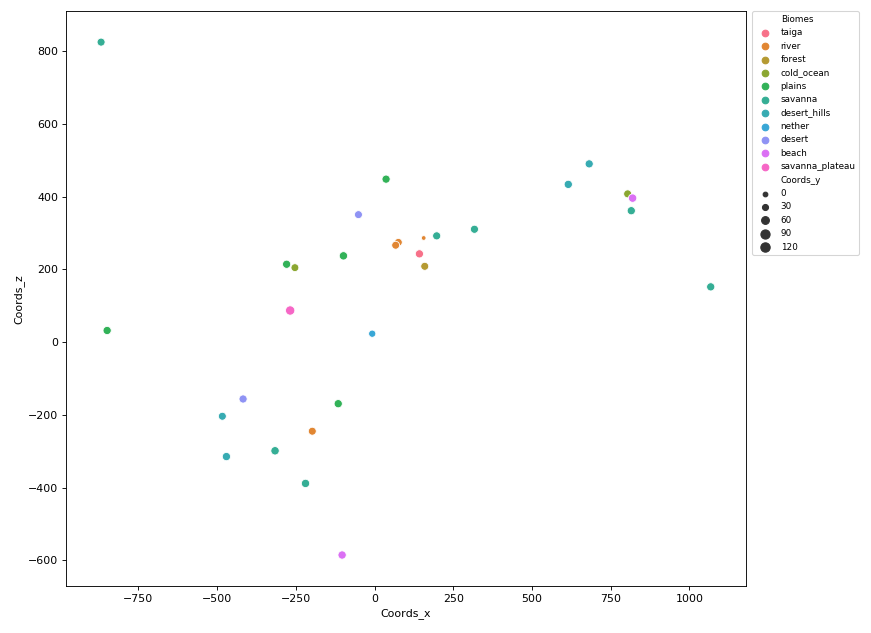

In [22]:
%matplotlib notebook
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Generate data x, y for scatter and an array of images.
x = df.Coords_x
y = df.Coords_z
arr = df.Image.values

# create figure and plot scatter
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
line, = ax.plot(x,y, ls="", marker="o", alpha=0)

# create the annotations box
im = OffsetImage(arr[0], zoom=0.75)
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(arr[ind])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)  
sns.scatterplot(x='Coords_x',y='Coords_z',hue='Biomes',size='Coords_y', data=df, ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.,prop={'size': 8})
plt.tight_layout()
plt.show()

In [ ]:
# Crawl images and save text to .txt file.
for entry in os.scandir(screenshot_dir):
    if entry.path.endswith(".png") and entry.is_file():
        img = cv2.imread(entry.path)

        processed_img = process_image(img)
        params = [cv2.IMWRITE_PNG_COMPRESSION, 1]
        cv2.imwrite(os.path.join(processed_dir,'{}.png'.format(entry.name)), processed_img, params)

        string_Gvision = get_string_gvision(processed_img)

        filename_gvis = os.path.join(output_dir, "{}.txt".format(os.path.splitext(entry.name)[0]))
        file = open(filename_gvis,"w", encoding="utf-8")  
        file.writelines(string_Gvision) 
        file.close()

    pass

In [ ]:
# get coords from text file, if it fails to find a matching pair it will skip and not append
coords = []
biomes = []
for entry in os.scandir(output_dir):
    if entry.path.endswith(".txt") and entry.is_file():
        with open(entry.path, 'r', encoding="utf8") as file:
            data = file.read().replace('\n', '')
        coord = get_coords(data)
        biome = get_biome(data)
        if coord:
            coords.append(coord)
            if biome:
                biomes.append(biome)
            else:
                biomes.append(['unknown'])